In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np


In [2]:
region = 'ningaloo_pass062'
# area = [113, -23, 115, -20.5] # Ningaloo
area = [113, -23, 114.5, -21.5] # Ningaloo

satpass = '062' # 062 or 131
ncfiles = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_{satpass}*.nc'))

# region = 'ningaloo_pass131'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_131*.nc'))

In [3]:
# Merge all dataset

from datetime import datetime
def add_time_dim(xda):
    #xda = xda.expand_dims(satpass = [datetime.now()])
    xda = xda.expand_dims(satpass = [xda.time.mean().values])
    return xda

drop_vars=['i_num_line','i_num_pixel']
dsall = xr.open_mfdataset(ncfiles, preprocess=add_time_dim, 
                          drop_variables=drop_vars,
                         )
# Subsample
ds = dsall
selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area

<xarray.Dataset>
Dimensions:               (satpass: 12, num_lines: 92, num_pixels: 65)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-08-13T07:02:51.100379...
    latitude              (num_lines, num_pixels) float64 -21.33 ... -23.14
    longitude             (num_lines, num_pixels) float64 114.5 114.4 ... 113.5
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    ssha                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    ssha_noiseless        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    ssha_unedited         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    quality_flag          (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    ugosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    vgosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    sigma0                (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 92, 65), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 dask.array<chunksize=(1, 65, 92), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    time_coverage_begin:             2023-08-13T06:37:09Z
    time_coverage_end:               2023-08-13T07:28:35Z
    geospatial_lat_min:              -78.271903
    geospatial_lat_max:              78.272068
    geospatial_lon_min:              26.984801
    geospatial_lon_max:              193.914251

In [4]:
ds_area.to_netcdf(f'./SWOT_L3_v1_0_{satpass}_Ningaloo.nc')

/home/jupyter-mrayson/.local/lib/python3.10/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


In [59]:
import s3fs
import cmocean # Oceanography colour maps

# Login to the s3 bucket and list the folders in the base directory of the imos-data/ bucket

fs = s3fs.S3FileSystem(anon=True) # Note that we can login anonymously because this bucket allows it

aodn = fs.ls('imos-data/')
for item in aodn:
    print(item)

imos-data/AIMS
imos-data/Bureau_of_Meteorology
imos-data/CSIRO
imos-data/Curtin_University
imos-data/Deakin_University
imos-data/Defence_Technology_Agency-New_Zealand
imos-data/Department_of_Defence
imos-data/Department_of_Environment_and_Science-Queensland
imos-data/Department_of_Planning_and_Environment-New_South_Wales
imos-data/Department_of_Transport-Western_Australia
imos-data/Derwent_Estuary_Program
imos-data/Flinders_University
imos-data/Future_Reef_MAP
imos-data/Gippsland-Ports-Victoria
imos-data/IMOS
imos-data/Macquarie_University
imos-data/NSW-OEH
imos-data/Pilbara_Ports_Authority
imos-data/Southern_Cross_University
imos-data/TERN
imos-data/UNSW
imos-data/UON
imos-data/UWA
imos-data/WAMSI
imos-data/aodn.js
imos-data/error.html
imos-data/index.html
imos-data/robots.txt


In [60]:

# satpass 62
swottime = 7
timestr ='20240127'
year = 2024

# swottime = 8
# timestr ='20240217'
# year = 2024

# swottime = 9
# timestr ='20240309'
# year = 2024

# swottime = 10
# timestr ='20240329'
# year = 2024

# swottime = 11
# timestr ='20240420'
# year = 2024

####
## satpass 132
# swottime = 9
# timestr ='20240311'

# swottime = 8
# timestr ='20240219'

# swottime = 7
# timestr ='20240129'
# year = 2024

# swottime = 3
# timestr ='20231107'
# year = 2023

# swottime = 2
# timestr ='20231017'
# year = 2023

# swottime = 1
# timestr ='20230904'
# year = 2023

# swottime = 0
# timestr ='20230814'
# year = 2023


# swottime = 1
# timestr ='20230905'
# year = 2023

print(ds_area.satpass.values[swottime])

aodn = fs.glob('imos-data/IMOS/SRS/SST/ghrsst/L3C-1d/ngt/snpp/{}/{}*.nc'.format(year,timestr))
for item in aodn:
    print(item)

2024-01-27T05:03:30.628316228
imos-data/IMOS/SRS/SST/ghrsst/L3C-1d/ngt/snpp/2024/20240127152000-ABOM-L3C_GHRSST-SSTskin-VIIRS_NPP-1d_night.nc


In [61]:
fileobj = fs.open(aodn[0])
sst = xr.open_dataset(fileobj)
x1,x2=area[0], area[2]
y1,y2=area[1], area[3]
mysst = sst.sel(lon=slice(x1,x2), lat=slice(y2,y1))

dx, dy = np.gradient(mysst['sea_surface_temperature'].squeeze())
x,y = mysst.lon, mysst.lat

# plt.figure()
# ax=plt.subplot(111)

# Swot gradient
var1 = 'ssha'

xs = ds_area['longitude']
ys = ds_area['latitude']
dxs, dys = np.gradient(ds_area.isel(satpass=swottime)[var1], 1)

In [62]:
np.nanmean(np.abs(dxs+1j*dys))

0.007828587835370236

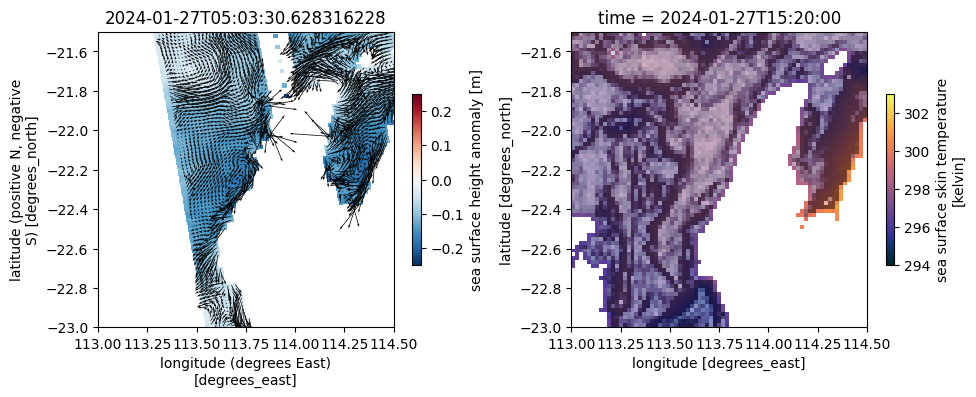

In [64]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="RdBu_r",
    vmin=-0.25,
    vmax=0.25,
    cbar_kwargs={"shrink": 0.3},)

ds_area.isel(satpass=swottime)[var1].plot.pcolormesh(ax=ax1, **plot_kwargs)
# ax1.pcolormesh(xs,ys,np.abs(dxs+1j*dys), vmin=0, vmax=0.1, cmap='bone_r', alpha=0.2)
u,v = ds_area.isel(satpass=swottime)['ugosa'], \
        ds_area.isel(satpass=swottime)['vgosa']
ax1.quiver(xs, ys, u, v, scale_units='xy', scale=10)

ax1.set_title(ds_area.satpass.values[swottime])

mysst['sea_surface_temperature'].plot(ax=ax2, cmap='cmo.thermal',vmin=21+273, vmax=30+273,cbar_kwargs={"shrink": 0.3,})
ax2.pcolormesh(x,y,np.abs(dx+1j*dy), vmin=0, vmax=0.2, cmap='bone_r', alpha=0.5)
# ax2.quiver(xs, ys, u, v, scale_units='xy', scale=10)

# c=plot_swot_basemap(ax, (x1,x2), (y1,y2))
ax1.set_xlim(x1,x2)
ax1.set_ylim(y1,y2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

plt.tight_layout()


# Sentinel-2 scenes

21st Apr 2024:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.08909&lng=113.27179&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2024-04-21T00%3A00%3A00.000Z&toTime=2024-04-21T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=7&gamma=0.4&demSource3D=%22MAPZEN%22

27th Jan 2024:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.21391&lng=113.02734&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2024-01-27T00%3A00%3A00.000Z&toTime=2024-01-27T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&gain=5.6&gamma=0.7&demSource3D=%22MAPZEN%22

14th October 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.44023&lng=113.29102&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-10-14T00%3A00%3A00.000Z&toTime=2023-10-14T23%3A59%3A59.999Z&layerId=6-SWIR&gain=2&gamma=0.5&demSource3D=%22MAPZEN%22


4 September 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=10&lat=-22.27576&lng=113.62335&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-09-04T00%3A00%3A00.000Z&toTime=2023-09-04T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=0.5&gamma=0.5&demSource3D=%22MAPZEN%22

30 August 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=8&lat=-21.74164&lng=112.98889&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-08-30T00%3A00%3A00.000Z&toTime=2023-08-30T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&gain=2.6&gamma=0.4&demSource3D=%22MAPZEN%22

10 August 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-21.83251&lng=113.2251&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-08-10T00%3A00%3A00.000Z&toTime=2023-08-10T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=2.6&gamma=0.4&demSource3D=%22MAPZEN%22

